In [53]:
import pandas as pnd

In [54]:
import os

In [55]:
years_begin = 1900
years_end = 2000
years_step = 5
years_chck = [1950]
path_name = 'names'
children_names = ['Ruth', 'Robert']

In [56]:
DATA_PATH = os.path.join(os.getcwd(),path_name)

In [57]:
DATA_PATH

'C:\\Users\\irina\\source\\repos\\ex4-2\\names'

In [58]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)
str_ch_names = '","'.join(children_names)

In [59]:
str_ch_names = 'Name == ["'+str_ch_names+'"]'

In [60]:
data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

In [61]:
for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

In [62]:
if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

In [63]:
grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

In [64]:
plot_data = grouped_data.unstack('Name')

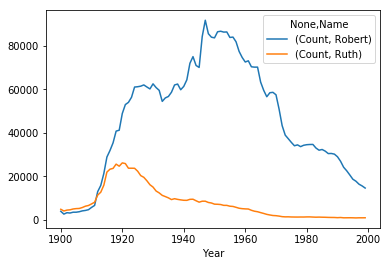

In [65]:
plot_data.plot()

In [66]:
data_pathes = []
data_years = []
for year in range(years_begin, years_end, years_step):
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.query(str_ch_names)

grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

plot_data = grouped_data.unstack('Name')

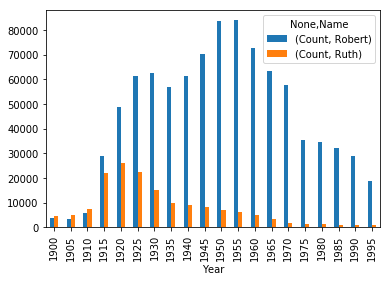

In [67]:
plot_data.plot.bar()

In [69]:
data_pathes = []
data_years = []
for year in years_chck:
    str_year = "yob" + str(year)+ ".txt"
    path_test = os.path.join(DATA_PATH, str_year)
    if os.path.exists(path_test) and os.path.isfile(path_test):
        data_pathes.append(path_test)
        data_years.append(year)

data_for_analytics = []
for dp in data_pathes:
    data_for_analytics.append(pnd.read_csv(dp, names = ['Name', 'Gender', 'Count']))

for data_elem_analytics, year_elem in zip(data_for_analytics, data_years):
    len_df = len(data_elem_analytics)
    year_series = pnd.Series((year_elem) for i in range(len_df))
    data_elem_analytics['Year'] = year_series

if len(data_for_analytics):
    data_by_all_years_with_years = pnd.concat(data_for_analytics)
    data_by_children_by_all_year = data_by_all_years_with_years.loc[data_by_all_years_with_years['Name'][0] == "R"]

grouped_data = data_by_children_by_all_year.groupby(['Year', 'Name']).sum()

plot_data = grouped_data.unstack('Name')

KeyError: False